In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import warnings
warnings.filterwarnings("ignore")
import itertools
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
from keras.utils.data_utils import get_file

In [ ]:
# Downloading training and test sets to local drive
try:
    training_set_path = get_file('KDDTrain%2B.csv', origin='https://raw.githubusercontent.com/defcom17/NSL_KDD/master/KDDTrain%2B.csv')
except:
    print('Error downloading')
    raise


try:
    test_set_path = get_file('KDDTest%2B.csv', origin='https://raw.githubusercontent.com/defcom17/NSL_KDD/master/KDDTest%2B.csv')
except:
    print('Error downloading')
    raise
training_df = pd.read_csv(training_set_path, header=None)
testing_df = pd.read_csv(test_set_path, header=None)




2639177/2639177 [==============================] - 0s 0us/step


In [ ]:
training_df.head()

,0,1,2,3,4,5,6,7,8,9,...,33,34,35,36,37,38,39,40,41,42
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21


In [ ]:
testing_df.head()

,0,1,2,3,4,5,6,7,8,9,...,33,34,35,36,37,38,39,40,41,42
0,0,tcp,private,REJ,0,0,0,0,0,0,...,0.04,0.06,0.00,0.00,0.0,0.0,1.00,1.00,neptune,21
1,0,tcp,private,REJ,0,0,0,0,0,0,...,0.00,0.06,0.00,0.00,0.0,0.0,1.00,1.00,neptune,21
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,0.61,0.04,0.61,0.02,0.0,0.0,0.00,0.00,normal,21
3,0,icmp,eco_i,SF,20,0,0,0,0,0,...,1.00,0.00,1.00,0.28,0.0,0.0,0.00,0.00,saint,15
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,0.31,0.17,0.03,0.02,0.0,0.0,0.83,0.71,mscan,11


In [ ]:
 columns = [
    'duration',
    'protocol_type',
    'service',
    'flag',
    'src_bytes',
    'dst_bytes',
    'land',
    'wrong_fragment',
    'urgent',
    'hot',
    'num_failed_logins',
    'logged_in',
    'num_compromised',
    'root_shell',
    'su_attempted',
    'num_root',
    'num_file_creations',
    'num_shells',
    'num_access_files',
    'num_outbound_cmds',
    'is_host_login',
    'is_guest_login',
    'count',
    'srv_count',
    'serror_rate',
    'srv_serror_rate',
    'rerror_rate',
    'srv_rerror_rate',
    'same_srv_rate',
    'diff_srv_rate',
    'srv_diff_host_rate',
    'dst_host_count',
    'dst_host_srv_count',
    'dst_host_same_srv_rate',
    'dst_host_diff_srv_rate',
    'dst_host_same_src_port_rate',
    'dst_host_srv_diff_host_rate',
    'dst_host_serror_rate',
    'dst_host_srv_serror_rate',
    'dst_host_rerror_rate',
    'dst_host_srv_rerror_rate',
    'outcome',
    'difficulty'
]
training_df.columns = columns
testing_df.columns = columns

In [ ]:
print("Training set has {} rows.".format(len(training_df)))
print("Testing set has {} rows.".format(len(testing_df)))

Training set has 125973 rows.
Testing set has 22543 rows.


In [ ]:
training_outcomes=training_df["outcome"].unique()
testing_outcomes=testing_df["outcome"].unique()
print("The training set has {} possible outcomes \n".format(len(training_outcomes)) )
print(", ".join(training_outcomes)+".")
print("\nThe testing set has {} possible outcomes \n".format(len(testing_outcomes)))
print(", ".join(testing_outcomes)+".")

The training set has 23 possible outcomes 

normal, neptune, warezclient, ipsweep, portsweep, teardrop, nmap, satan, smurf, pod, back, guess_passwd, ftp_write, multihop, rootkit, buffer_overflow, imap, warezmaster, phf, land, loadmodule, spy, perl.

The testing set has 38 possible outcomes 

neptune, normal, saint, mscan, guess_passwd, smurf, apache2, satan, buffer_overflow, back, warezmaster, snmpgetattack, processtable, pod, httptunnel, nmap, ps, snmpguess, ipsweep, mailbomb, portsweep, multihop, named, sendmail, loadmodule, xterm, worm, teardrop, rootkit, xlock, perl, land, xsnoop, sqlattack, ftp_write, imap, udpstorm, phf.


In [ ]:
# A list ot attack names that belong to each general attack type
dos_attacks=["snmpgetattack","back","land","neptune","smurf","teardrop","pod","apache2","udpstorm","processtable","mailbomb"]
r2l_attacks=["snmpguess","worm","httptunnel","named","xlock","xsnoop","sendmail","ftp_write","guess_passwd","imap","multihop","phf","spy","warezclient","warezmaster"]
u2r_attacks=["sqlattack","buffer_overflow","loadmodule","perl","rootkit","xterm","ps"]
probe_attacks=["ipsweep","nmap","portsweep","satan","saint","mscan"]

# Our new labels
classes=["Normal","Dos","R2L","U2R","Probe"]

#Helper function to label samples to 5 classes
def label_attack (row):
    if row["outcome"] in dos_attacks:
        return classes[1]
    if row["outcome"] in r2l_attacks:
        return classes[2]
    if row["outcome"] in u2r_attacks:
        return classes[3]
    if row["outcome"] in probe_attacks:
        return classes[4]
    return classes[0]


#We combine the datasets temporarily to do the labeling
test_samples_length = len(testing_df)
df=pd.concat([training_df,testing_df])
df["Class"]=df.apply(label_attack,axis=1)


# The old outcome field is dropped since it was replaced with the Class field, the difficulty field will be dropped as well.
df=df.drop("outcome",axis=1)
df=df.drop("difficulty",axis=1)

# we again split the data into training and test sets.
type_testing_df = testing_df
training_df= df.iloc[:-test_samples_length, :]
testing_df= df.iloc[-test_samples_length:,:]

In [ ]:
training_outcomes=training_df["Class"].unique()
testing_outcomes=testing_df["Class"].unique()
print("The training set has {} possible outcomes \n".format(len(training_outcomes)) )
print(", ".join(training_outcomes)+".")
print("\nThe testing set has {} possible outcomes \n".format(len(testing_outcomes)))
print(", ".join(testing_outcomes)+".")

The training set has 5 possible outcomes 

Normal, Dos, R2L, Probe, U2R.

The testing set has 5 possible outcomes 

Dos, Normal, Probe, R2L, U2R.


In [ ]:
# Helper function for scaling continous values
def minmax_scale_values(training_df,testing_df, col_name):
    scaler = MinMaxScaler()
    scaler = scaler.fit(training_df[col_name].values.reshape(-1, 1))
    train_values_standardized = scaler.transform(training_df[col_name].values.reshape(-1, 1))
    training_df[col_name] = train_values_standardized
    test_values_standardized = scaler.transform(testing_df[col_name].values.reshape(-1, 1))
    testing_df[col_name] = test_values_standardized


#Helper function for one hot encoding
def encode_text(training_df,testing_df, name):
    training_set_dummies = pd.get_dummies(training_df[name])
    testing_set_dummies = pd.get_dummies(testing_df[name])
    for x in training_set_dummies.columns:
        dummy_name = "{}_{}".format(name, x)
        training_df[dummy_name] = training_set_dummies[x]
        if x in testing_set_dummies.columns :
            testing_df[dummy_name]=testing_set_dummies[x]
        else :
            testing_df[dummy_name]=np.zeros(len(testing_df))
    training_df.drop(name, axis=1, inplace=True)
    testing_df.drop(name, axis=1, inplace=True)


sympolic_columns=["protocol_type","service","flag"]
label_column="Class"
for column in df.columns :
    if column in sympolic_columns:
        encode_text(training_df,testing_df,column)
    elif not column == label_column:
        minmax_scale_values(training_df,testing_df, column)

In [ ]:
training_df.head(5)

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
0,0.0,3.558064e-07,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,1,0
1,0.0,1.057999e-07,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,1,0
2,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,1,0,0,0,0,0
3,0.0,1.681203e-07,6.223962e-06,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0,0,0,0,0,0,0,0,1,0
4,0.0,1.442067e-07,3.206260e-07,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
training_df.columns

Index(['duration', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment',
       'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised',
       ...
       'flag_REJ', 'flag_RSTO', 'flag_RSTOS0', 'flag_RSTR', 'flag_S0',
       'flag_S1', 'flag_S2', 'flag_S3', 'flag_SF', 'flag_SH'],
      dtype='object', length=123)

In [ ]:
# Assuming 'data' is the DataFrame
column_names = training_df.columns.tolist()

# Display all column names
for name in column_names:
    print(name)
np.save('/content/drive/MyDrive/Colab Notebooks/xNIDS/Data/kdd_after_features.npy', column_names)

duration
src_bytes
dst_bytes
land
wrong_fragment
urgent
hot
num_failed_logins
logged_in
num_compromised
root_shell
su_attempted
num_root
num_file_creations
num_shells
num_access_files
num_outbound_cmds
is_host_login
is_guest_login
count
srv_count
serror_rate
srv_serror_rate
rerror_rate
srv_rerror_rate
same_srv_rate
diff_srv_rate
srv_diff_host_rate
dst_host_count
dst_host_srv_count
dst_host_same_srv_rate
dst_host_diff_srv_rate
dst_host_same_src_port_rate
dst_host_srv_diff_host_rate
dst_host_serror_rate
dst_host_srv_serror_rate
dst_host_rerror_rate
dst_host_srv_rerror_rate
Class
protocol_type_icmp
protocol_type_tcp
protocol_type_udp
service_IRC
service_X11
service_Z39_50
service_aol
service_auth
service_bgp
service_courier
service_csnet_ns
service_ctf
service_daytime
service_discard
service_domain
service_domain_u
service_echo
service_eco_i
service_ecr_i
service_efs
service_exec
service_finger
service_ftp
service_ftp_data
service_gopher
service_harvest
service_hostnames
service_http
serv

In [ ]:
x,y=training_df,training_df.pop("Class").values
x=x.values
x_test,y_test=testing_df,testing_df.pop("Class").values
x_test=x_test.values
y0=np.ones(len(y),np.int8)
y0[np.where(y==classes[0])]=0
y0_test=np.ones(len(y_test),np.int8)
y0_test[np.where(y_test==classes[0])]=0
input_shape = x.shape[1]

26/26 [==============================] - 5s 151ms/step - loss: 0.1178
Model saved.
Model loaded.
705/705 [==============================] - 1s 2ms/step


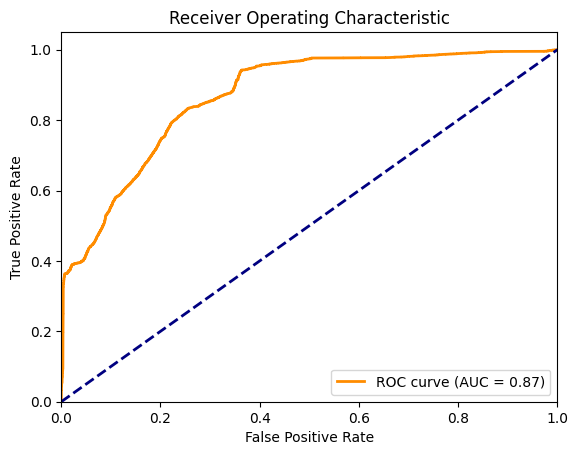

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from tensorflow import keras

# Define the autoencoder architecture with additional layers
input_dim = x.shape[1]
encoding_dim = 100  # Adjust the size of the encoding layer as per your requirements

input_data = keras.Input(shape=(input_dim,))
encoded = keras.layers.Dense(256, activation='relu')(input_data)
dropout_encoded = keras.layers.Dropout(0.1)(encoded)
encoded2 = keras.layers.Dense(128, activation='relu')(dropout_encoded)
dropout_encoded2 = keras.layers.Dropout(0.1)(encoded2)
encoded3 = keras.layers.Dense(64, activation='relu')(dropout_encoded2)
dropout_encoded3 = keras.layers.Dropout(0.1)(encoded3)
encoded4 = keras.layers.Dense(128, activation='relu')(dropout_encoded3)
dropout_encoded4 = keras.layers.Dropout(0.1)(encoded4)
encoded5 = keras.layers.Dense(256, activation='relu')(dropout_encoded4)
dropout_encoded5 = keras.layers.Dropout(0.1)(encoded5)
decoded = keras.layers.Dense(input_dim, activation='sigmoid')(dropout_encoded5)

autoencoder = keras.Model(input_data, decoded)

from tensorflow.keras.optimizers import Adam

# Assuming 'autoencoder' is the model you want to compile
learning_rate = 0.001  # Learning rate value

# Create an optimizer with the desired learning rate
optimizer = Adam(learning_rate=learning_rate)
autoencoder.compile(optimizer=optimizer, loss='mse')
# Train the autoencoder
autoencoder.fit(x, x, epochs=1, batch_size=5000)

# Save the model
model_path = "/content/drive/MyDrive/Colab Notebooks/xNIDS/Models/autoencoder_model.h5"
autoencoder.save(model_path)
print("Model saved.")

# Load the model
loaded_model = keras.models.load_model(model_path)
print("Model loaded.")

# Use the loaded model for anomaly detection
reconstructed_data = loaded_model.predict(x_test)
mse = np.mean(np.power(x_test - reconstructed_data, 2), axis=1)  # Compute mean squared error

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y0_test, mse)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50)                34600     
                                                                 
 dense_6 (Dense)             (None, 1)                 51        
                                                                 
Total params: 34,651
Trainable params: 34,651
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
21/21 [==============================] - 4s 60ms/step - loss: 0.6069 - accuracy: 0.8745 - val_loss: 0.5318 - val_accuracy: 0.9060
Epoch 2/100
21/21 [==============================] - 1s 37ms/step - loss: 0.4677 - accuracy: 0.9124 - val_loss: 0.3905 - val_accuracy: 0.9183
Epoch 3/100
21/21 [==============================] - 1s 43ms/step - loss: 0.3340 - accuracy: 0.9244 - val_loss: 0.2725 - val_accuracy: 0.9337
Epoch 4/100
21/21 [===

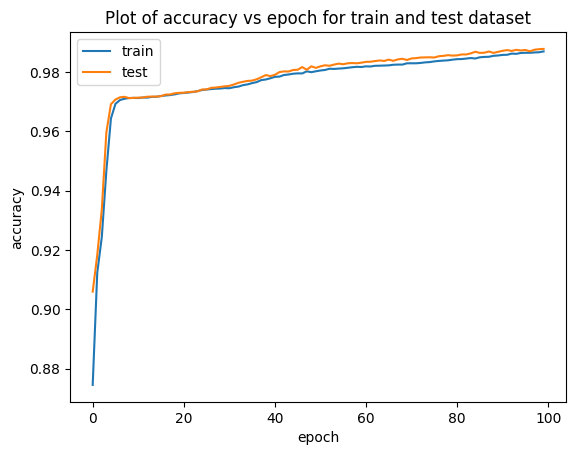

In [ ]:

x_train = np.reshape(x, (x.shape[0],1,x.shape[1]))
x_train.shape
x_test = np.reshape(x_test, (x_test.shape[0],1,x_test.shape[1]))
x_test.shape

# LSTM requirements
from tensorflow import keras
from keras.layers import LSTM
from keras.layers import Input
from keras.models import Model
from keras.layers import Dense # importing dense layer
from keras.models import Sequential #importing Sequential layer

lst = Sequential()
# input layer and LSTM layer with 50 neurons
lst.add(LSTM(50,input_dim=122))

# outpute layer with sigmoid activation
lst.add(Dense(1,activation='sigmoid'))
lst.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
lst.summary()
history = lst.fit(x_train, y0, epochs=100, batch_size=5000,validation_split=0.2)
test_results = lst.evaluate(x_test, y0_test, verbose=1)
print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1]*100}%')
# Save the model
model_path = "/content/drive/MyDrive/Colab Notebooks/xNIDS/Models/lstm_model.h5"
lst.save(model_path)
print("Model saved.")

# Load the model
new_model = keras.models.load_model(model_path)

# Check its architecture
new_model.summary()
print("Model loaded.")

import matplotlib.pyplot as plt
# Plot of accuracy vs epoch of train and test dataset
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Plot of accuracy vs epoch for train and test dataset")
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()




In [ ]:
# Prepare data for explanations.
# Make predictions
predicted_probabilities = lst.predict(x_test)
predicted_labels = (predicted_probabilities >= 0.5).astype(int)

rnn_false_positives = []  # Store indices of false positives
rnn_false_negatives = []  # Store indices of false negatives
for i in range(len(predicted_labels)):
    if predicted_labels[i][0] != y0_test[i]:
        if predicted_labels[i][0] == 1:  # False positive
            rnn_false_positives.append(i)
        else:
           rnn_false_negatives.append(i)

705/705 [==============================] - 1s 1ms/step


In [ ]:
#rnn_false_positives

In [ ]:
#rnn_false_negatives

In [ ]:
kdd_selected_fp_rows = type_testing_df.loc[570:571]
kdd_selected_fp_rows_122 = pd.DataFrame(x_test[570:572].reshape(2,122))
kdd_selected_fp_rows.to_csv('/content/drive/MyDrive/Colab Notebooks/xNIDS/Data/kdd_selected_fp_rows.csv', index=True)
kdd_selected_fp_rows_122.to_csv('/content/drive/MyDrive/Colab Notebooks/xNIDS/Data/kdd_selected_fp_rows_122.csv', index=True)

# 22439 false postives  udp private normal
# 571 0.69

In [ ]:
predicted_probabilities[571]

array([0.7116914], dtype=float32)

In [ ]:
y0_test[571]

0

In [ ]:
predicted_labels[571][0]

1

In [ ]:
kdd_selected_fp_rows

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,outcome,difficulty
570,0,tcp,http,SF,257,5320,0,0,0,0,...,1.00,0.00,0.0,0.0,0.00,0.0,0.00,0.0,normal,21
571,0,tcp,http,SF,239,3222,0,0,0,0,...,0.03,0.01,0.0,0.0,0.02,0.0,0.02,0.0,normal,18


In [ ]:
y0_test[21930]

1

In [ ]:
predicted_labels[21930][0]

0

In [ ]:
kdd_selected_fn_rows = type_testing_df.loc[21920:21930]
kdd_selected_fn_rows_122 = pd.DataFrame(x_test[21920:21931].reshape(11,122))
kdd_selected_fn_rows.to_csv('/content/drive/MyDrive/Colab Notebooks/xNIDS/Data/kdd_selected_fn_rows.csv', index=True)
kdd_selected_fn_rows_122.to_csv('/content/drive/MyDrive/Colab Notebooks/xNIDS/Data/kdd_selected_fn_rows_122.csv', index=True)

In [ ]:
predicted_probabilities[21930]

array([0.44356757], dtype=float32)

In [ ]:
kdd_selected_fn_rows

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,outcome,difficulty
21920,0,tcp,http,SF,325,4960,0,0,0,0,...,1.00,0.00,0.00,0.01,0.0,0.0,0.00,0.0,normal,21
21921,1,tcp,smtp,SF,2599,293,0,0,0,0,...,0.81,0.13,0.00,0.00,0.0,0.0,0.18,0.0,mailbomb,11
21922,0,tcp,private,S0,0,0,0,0,0,0,...,0.05,0.05,0.00,0.00,1.0,1.0,0.00,0.0,neptune,21
21923,0,tcp,http,SF,223,5989,0,0,0,0,...,1.00,0.00,0.01,0.02,0.0,0.0,0.00,0.0,normal,21
21924,4,tcp,pop_3,SF,32,93,0,0,0,0,...,0.56,0.02,0.00,0.00,0.0,0.0,0.15,0.0,guess_passwd,15
21925,0,icmp,eco_i,SF,20,0,0,0,0,0,...,1.00,0.00,1.00,0.27,0.0,0.0,0.00,0.0,saint,15
21926,4,tcp,pop_3,SF,26,93,0,0,0,0,...,0.87,0.02,0.01,0.02,0.0,0.0,0.07,0.0,guess_passwd,9
21927,0,tcp,http,SF,219,18353,0,0,0,0,...,1.00,0.00,0.12,0.03,0.0,0.0,0.00,0.0,normal,21
21928,0,tcp,http,SF,239,1905,0,0,0,0,...,1.00,0.00,0.00,0.00,0.0,0.0,0.00,0.0,normal,21
21929,0,tcp,ftp_data,SF,12,0,0,0,0,0,...,0.83,0.33,0.83,0.14,0.0,0.0,0.00,0.0,warezmaster,5


In [ ]:
kdd_selected_fn_rows_122

,0,1,2,3,4,5,6,7,8,9,...,112,113,114,115,116,117,118,119,120,121
0,0.000000,2.355134e-07,3.786440e-06,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.000023,1.883383e-06,2.236748e-07,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.000000,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,1.615984e-07,4.571974e-06,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.000093,2.318901e-08,7.099576e-08,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5,0.000000,1.449313e-08,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
6,0.000093,1.884107e-08,7.099576e-08,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
7,0.000000,1.586998e-07,1.401059e-05,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
8,0.000000,1.731929e-07,1.454268e-06,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
9,0.000000,8.695880e-09,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
